Atividade para fazer em dupla!
Utilize o dataset de BOs de Fortaleza. O dataset foi disponibilizado no site da SSPDS. 

1- Faça um breve análise exploratória do dataset
    1.1- Verifique a quantidade de ocorrências por cada tipo
    1.2- Plot as ocorrências no espaço, usando latitude e longitude
    1.3- Aplique uma outra análise que achar interessante
2- Para identificar regiões com alta taxas de crime, aplique os algoritmos de clusterização vistos DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) e clustering hieráquico (https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) sobre o dataset
    2.1 - Considere como atributos latitude e longitude das ocorrências. 
    2.2 - Varie os parâmetros de cada um dos algoritmos em pelo menos 3 valores diferentes. 
3 - Analise os resultados
    3.1 - Plot os dados, use uma cor diferente por cluster.


In [1]:
import pandas as pd

In [11]:
data = pd.read_csv("Cluster-Crime-Maio.csv.txt", index_col='ID')

In [16]:
data.drop(columns=['CLUSTER'], inplace=True)

In [17]:
data.to_csv("Cluster-Crime-Maio.gzip", compression="gzip")

In [56]:
data.head()

,FONTE,FLAGRANTE,NATUREZA DA OCORRÊNCIA,HISTÓRICO DA OCORRÊNCIA,LOCAL:,BAIRRO,SUSPEITO:,VEÍCULO:,VÍTIMA:,VÍTIMAS:,...,ARMA APREENDIDA:,MATERIAL APREENDIDO:,PLACA:,VÍTIMAS LESIONADAS:,SUSPEITOS:,HORA,MINUTO,DATA,LATITUDE,LONGITUDE
ID,,,,,,,,,,,,,,,,,,,,,
1,CIOPS,NÃO,MORTE - A BALA,"LOCAL: RUA CODO, JANGURUSSU. VÍTIMA: TIAGO S.P...","RUA CODO, JANGURUSSU",JANGURUSSU,nulo,nulo,TIAGO S,nulo,...,nulo,nulo,nulo,nulo,NÃO IDENTIFICADOS,10,37,01/05/17,-3.850046,-38.522390
2,CIOPS,NÃO,MORTE A BALA,"LOCAL: AV. LESTE OESTE, PIRAMBU. VÍTIMA: RAFAE...","AV. LESTE OESTE, PIRAMBU",PIRAMBU,nulo,nulo,RAFAEL RS,nulo,...,nulo,nulo,nulo,nulo,NÃO IDENTIFICADOS,11,50,01/05/17,-3.712388,-38.553322
3,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA TAILANDIA, GENIBAÚ. VÍTIMA: ISRAEL ...","RUA TAILANDIA, GENIBAU",GENIBAU,nulo,nulo,ISRAEL RA,nulo,...,nulo,nulo,nulo,nulo,NÃO IDENTIFICADOS,13,53,01/05/17,-3.758621,-38.604318
4,CIOPS,NÃO,MORTE A BALA,LOCAL: RUA DR JOAQUIM FROTA SAPIRANGA COITÉ. V...,RUA DR JOAQUIM FROTA SAPIRANGA COITE,RUA DR JOAQUIM FROTA SAPIRANGA COITE,nulo,nulo,DAVI M,nulo,...,nulo,nulo,nulo,nulo,NÃO IDENTIFICADOS,15,14,01/05/17,-3.801282,-38.472957
5,CIOPS,NÃO,MORTE A BALA,"LOCAL: RUA CARNAUBAL, ALVARO WEYNE. VÍTIMA: DI...","RUA CARNAUBAL, ALVARO WEYNE",ALVARO WEYNE,nulo,nulo,DIEGO T,nulo,...,nulo,nulo,nulo,nulo,NÃO IDENTIFICADOS,17,42,01/05/17,-3.722553,-38.582816


In [122]:
from  folium import Map
from folium.plugins import HeatMap

In [125]:
m = Map()
HeatMap(data=data[['LATITUDE', 'LONGITUDE']]).add_to(m)

In [126]:
m

In [57]:
import mplleaflet as mpl

In [60]:
data.plot(x='LONGITUDE',y='LATITUDE',kind='scatter')
mpl.display()

C:\Users\Livia\Miniconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [62]:
from sklearn.metrics.pairwise import haversine_distances

In [64]:
d = haversine_distances(data[['LATITUDE','LONGITUDE']], data[['LATITUDE','LONGITUDE']])

In [73]:
d_meters = d * 6371000/1000 

In [74]:
d_meters

array([[  0.        , 891.09796291, 712.8895701 , ..., 877.31467509,
        758.92975059, 673.01180013],
       [891.09796291,   0.        , 399.0322177 , ...,  71.59908128,
        283.89474545, 236.85294566],
       [712.8895701 , 399.0322177 ,   0.        , ..., 335.71290804,
        116.10445806, 392.54581085],
       ...,
       [877.31467509,  71.59908128, 335.71290804, ...,   0.        ,
        219.63544104, 255.01130757],
       [758.92975059, 283.89474545, 116.10445806, ..., 219.63544104,
          0.        , 314.38887676],
       [673.01180013, 236.85294566, 392.54581085, ..., 255.01130757,
        314.38887676,   0.        ]])

In [80]:
from matplotlib import pyplot as plt
import numpy as np

In [108]:
k = 100
knn = np.zeros(shape=[d_meters.shape[0],k])
for i in range(d_meters.shape[0]):
    idx = np.argpartition(d_meters[i,:], k)
    knn[i,:] = d_meters[i,idx[:k]]

In [152]:
knn

array([[ 68.97909034,  61.48224745,  58.57315357, ..., 273.88835412,
        284.51536334, 293.30099475],
       [123.75164507,   0.        ,  66.17821085, ..., 189.98997046,
        190.38210001, 193.64579333],
       [179.10086996,  51.08872147,   0.        , ..., 211.12965442,
        214.45641963, 215.65279773],
       ...,
       [  5.00133699,  78.89426043,  41.26694273, ..., 153.26271378,
        123.37951291, 162.26574651],
       [ 83.07958877, 100.94122072,  91.6350065 , ..., 178.38873519,
        175.84361574, 179.27682129],
       [ 69.76403848, 178.57423407, 138.4709377 , ..., 210.88606472,
        212.19485962, 212.9465805 ]])

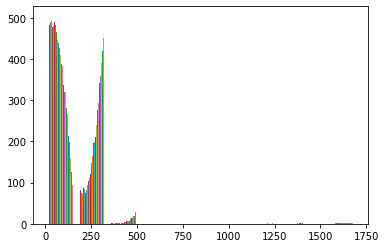

In [112]:
plt.hist(knn)
plt.show()

In [61]:
from sklearn.cluster import DBSCAN

In [168]:
dbscan = DBSCAN(eps=300,min_samples=4, metric='precomputed')

In [173]:
result = dbscan.fit(X=d_meters)

In [178]:
result.components_.shape

(131, 567)